# Logistic Regression

## Binary Classification Problem on iris dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading and exploring iris dataset

In [2]:
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris = iris[iris['species']!='virginica']

In [6]:
iris['species'] = iris['species'].map({'setosa': 1, 'versicolor': 0})

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [10]:
corr = iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.205926,0.812458,0.789608,-0.728290
sepal_width,-0.205926,1.000000,-0.602663,-0.570883,0.690684
petal_length,0.812458,-0.602663,1.000000,0.979322,-0.969990
petal_width,0.789608,-0.570883,0.979322,1.000000,-0.960307
species,-0.728290,0.690684,-0.969990,-0.960307,1.000000


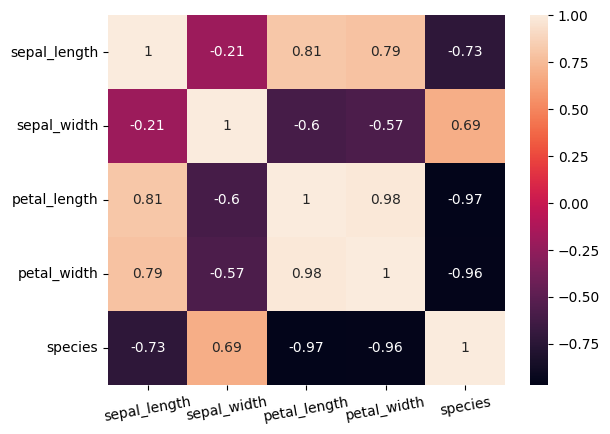

In [11]:
sns.heatmap(corr, annot=True)
plt.xticks(rotation=10)
plt.show()

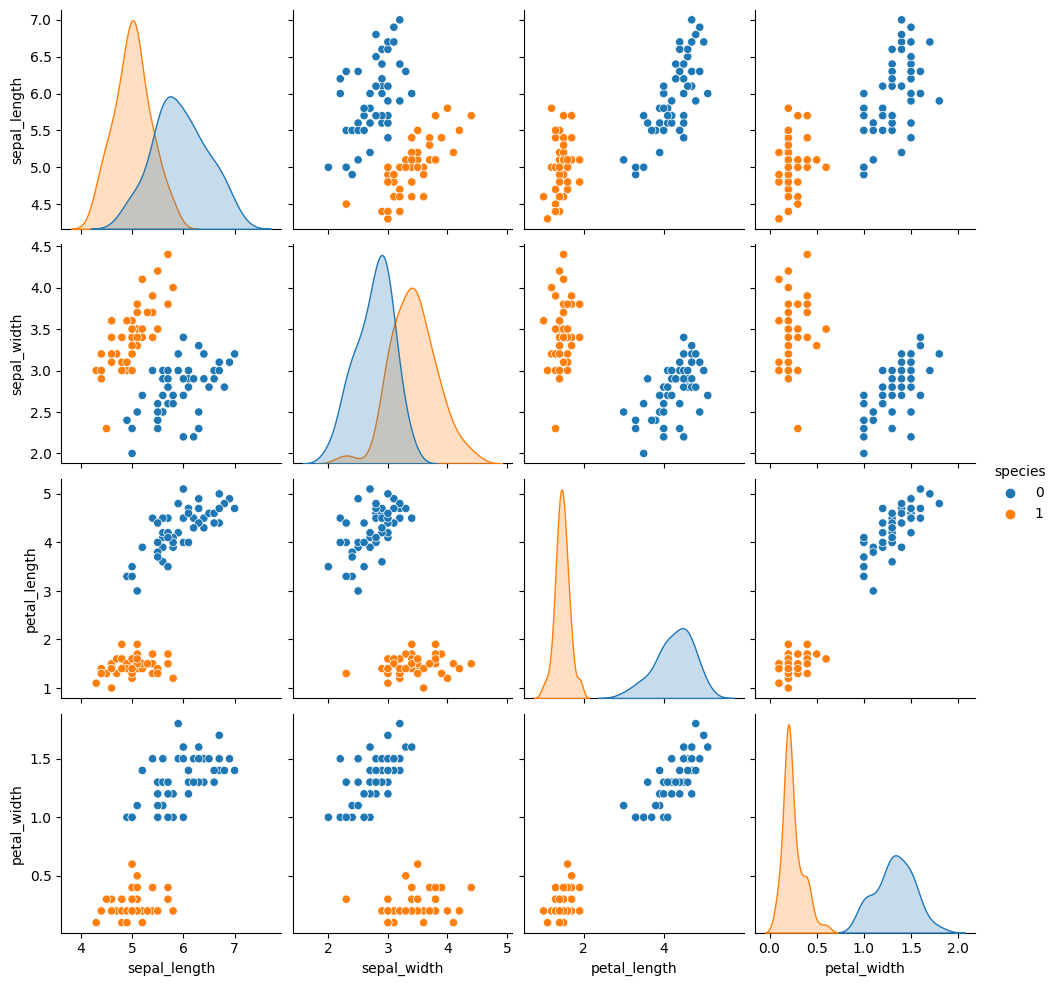

In [12]:
sns.pairplot(iris, hue='species')
plt.show()

## Choosing dependent and independent variables

In [13]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=iris[['species']]

## Spliting data for training and testing purposes

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=54)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [16]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1', 'l2'], 'C':[15, 30, 45, 60, 75, 85, 100], 'max_iter':[100, 200, 300], 'solver':['liblinear']}


In [17]:
classifier_regressor = GridSearchCV(classifier, param_grid = parameter, scoring = 'accuracy', cv = 5)

In [18]:
classifier_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [15, 30, 45, 60, 75, 85, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [19]:
print(classifier_regressor.best_params_)

{'C': 15, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [20]:
print(classifier_regressor.best_score_)

1.0


## Testing our Logistic Regressor model

In [21]:
y_pred = classifier_regressor.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [23]:
score = accuracy_score(y_pred, y_test)
score

1.0

In [24]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

